<a href="https://colab.research.google.com/github/shuangquan-li-con/ECON5200-37499-Applied-Data-Analytics-in-Economics/blob/main/Lab_2_of_Applied_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install fredapi
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

In [5]:
fred=Fred('c3b49229ae543b42f8b6ba5671ac5aa6')

In [6]:
print("Fetch data from FRED...")

Fetch data from FRED...


In [7]:
wages=fred.get_series('AHETPI')
cpi=fred.get_series('CPIAUCSL')
df=pd.DataFrame({'Nominal_Wage':wages,'CPI':cpi})

In [9]:
df=df.dropna()

In [10]:
print(df.head())
print(df.tail())

            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [14]:
from numpy import real
def get_real_wage(nominal_col,cpi_col):
  """
  Takes a nominal column and a CPI column.
  Returns a new column adjusted for inflation(Real Dollars).
  """
  cpi_today=cpi_col.iloc[-1]
  real_col=(nominal_col/cpi_col)*cpi_today
  return real_col

In [16]:
df['Real_wage']=get_real_wage(df['Nominal_Wage'],df['CPI'])

In [17]:
print(df.tail())

            Nominal_Wage      CPI  Real_wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


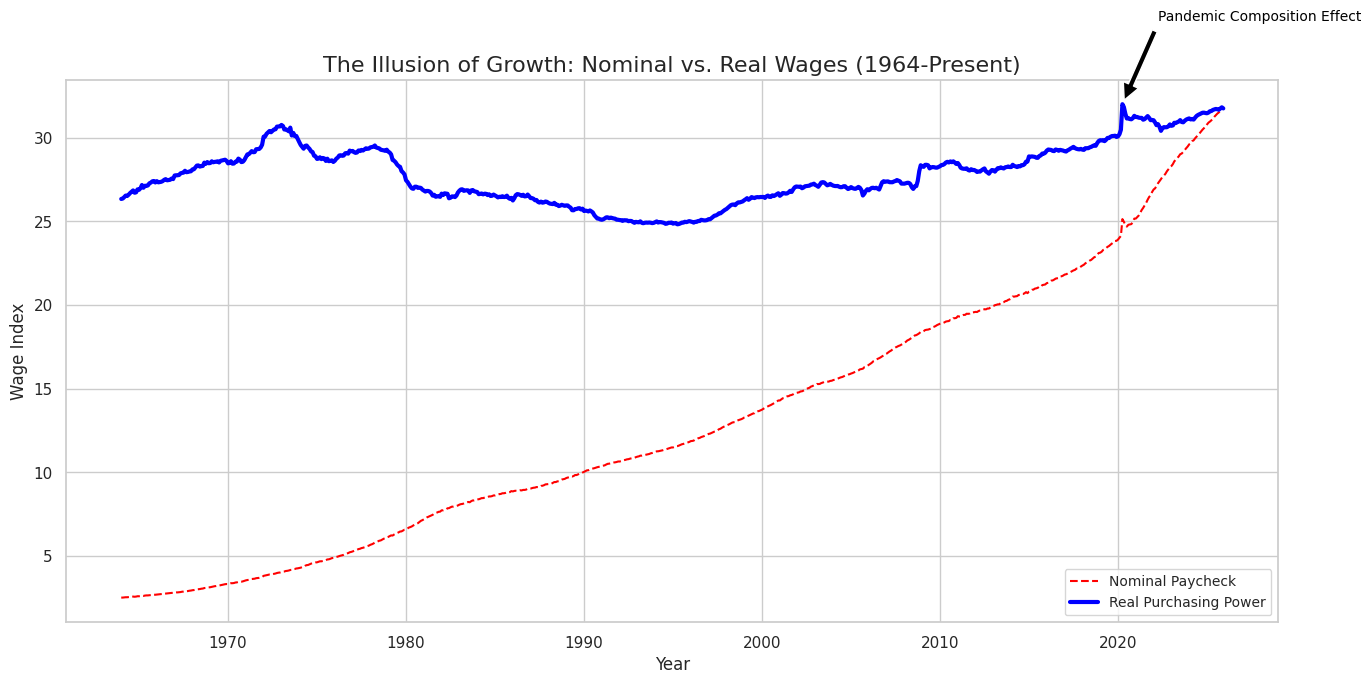

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set seaborn theme and figure size
sns.set_theme(style='whitegrid')
plt.figure(figsize=(14, 7))

# Plot Nominal_Wage
plt.plot(df.index, df['Nominal_Wage'], color='red', linestyle='--', label='Nominal Paycheck')

# Plot Real_Wage
plt.plot(df.index, df['Real_wage'], color='blue', linewidth=3, label='Real Purchasing Power')

# Add title and labels
plt.title('The Illusion of Growth: Nominal vs. Real Wages (1964-Present)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Wage Index', fontsize=12)
plt.legend(fontsize=10)

# Find the 2020 spike for annotation
# Ensure the index is datetime to use string indexing like '2020'
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

# Find the date of the maximum Real_wage in 2020
spike_date = df.loc['2020'].idxmax()['Real_wage']
spike_value = df.loc[spike_date, 'Real_wage']

# Add annotation for the 2020 spike
plt.annotate(
    'Pandemic Composition Effect',
    xy=(spike_date, spike_value),
    xytext=(spike_date + pd.DateOffset(years=2), spike_value + 5), # Adjust xytext for arrow head and text position
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize=10,
    color='black'
)

# Improve layout and display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

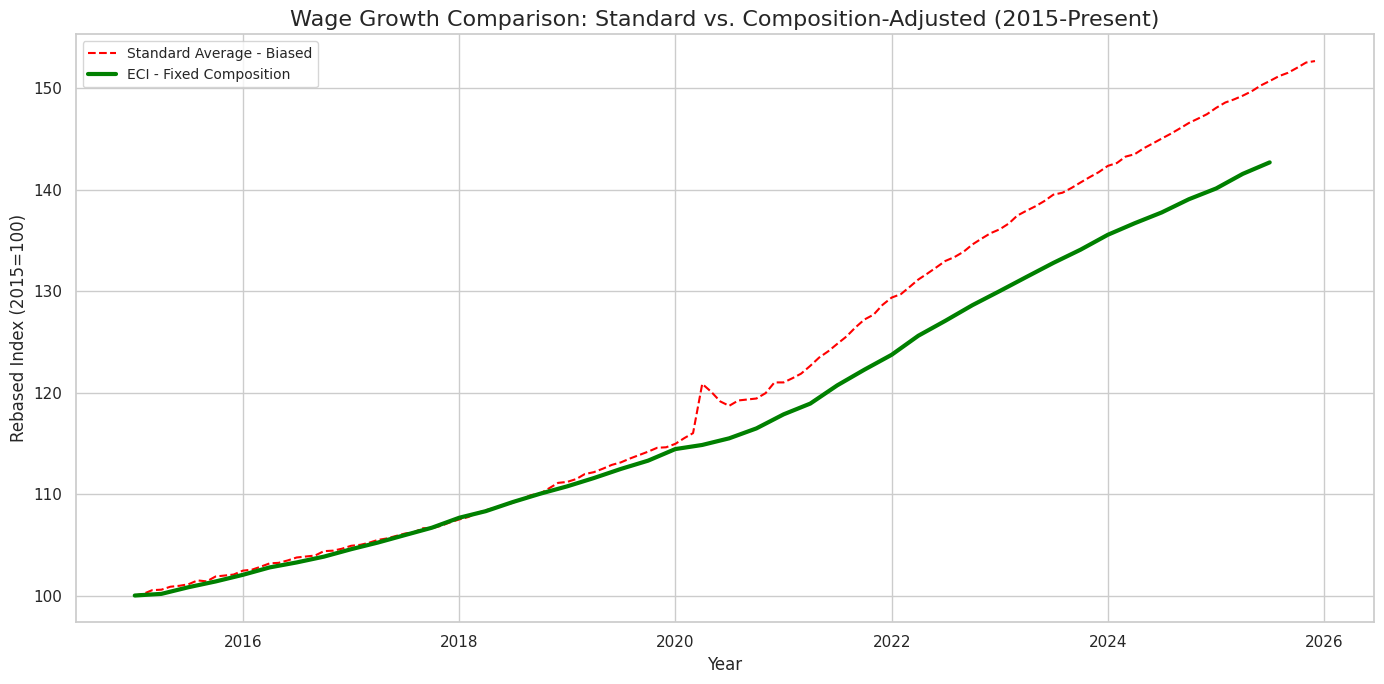

In [20]:
# 1. Fetch ECIWAG series
eci_wag = fred.get_series('ECIWAG')

# 2. Filter both series from 2015-01-01 onwards
start_date = '2015-01-01'
wages_filtered = wages[wages.index >= start_date]
eci_wag_filtered = eci_wag[eci_wag.index >= start_date]

# Drop any NaN values that might appear due to filtering or FRED data
wages_filtered = wages_filtered.dropna()
eci_wag_filtered = eci_wag_filtered.dropna()

# 3. Rebase both series to 100
# Ensure there are values to rebase
if not wages_filtered.empty:
    wages_rebased = (wages_filtered / wages_filtered.iloc[0]) * 100
else:
    print("Warning: 'wages_filtered' is empty, cannot rebase.")
    wages_rebased = pd.Series()

if not eci_wag_filtered.empty:
    eci_rebased = (eci_wag_filtered / eci_wag_filtered.iloc[0]) * 100
else:
    print("Warning: 'eci_wag_filtered' is empty, cannot rebase.")
    eci_rebased = pd.Series()

# 4. Plot them on the same chart
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')
plt.figure(figsize=(14, 7))

# Plot 'wages' as a Red Dashed Line
plt.plot(wages_rebased.index, wages_rebased.values, color='red', linestyle='--', label='Standard Average - Biased')

# Plot 'ECIWAG' as a Green Thick Line
plt.plot(eci_rebased.index, eci_rebased.values, color='green', linewidth=3, label='ECI - Fixed Composition')

plt.title('Wage Growth Comparison: Standard vs. Composition-Adjusted (2015-Present)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rebased Index (2015=100)', fontsize=12)
plt.legend(fontsize=10)

# 5. Annotate the divergence in 2020
# Find a suitable date in 2020 for annotation. Let's use Q2 2020 for the spike effect.
# Check if the 2020 data exists in both series
if '2020-05-01' in wages_rebased.index and '2020-05-01' in eci_rebased.index:
    # For 'Standard Average - Biased' (Artificial Spike)
    spike_date_biased = pd.to_datetime('2020-05-01') # Example date for spike
    spike_value_biased = wages_rebased.loc[spike_date_biased]
    plt.annotate(
        'Artificial Spike',
        xy=(spike_date_biased, spike_value_biased),
        xytext=(spike_date_biased + pd.DateOffset(months=6), spike_value_biased + 10),
        arrowprops=dict(facecolor='black', shrink=0.05),
        fontsize=10,
        color='red'
    )

    # For 'ECI - Fixed Composition' (Stable Growth)
    spike_date_stable = pd.to_datetime('2020-05-01') # Example date for stable growth
    spike_value_stable = eci_rebased.loc[spike_date_stable]
    plt.annotate(
        'Stable Growth',
        xy=(spike_date_stable, spike_value_stable),
        xytext=(spike_date_stable + pd.DateOffset(months=6), spike_value_stable - 10),
        arrowprops=dict(facecolor='black', shrink=0.05),
        fontsize=10,
        color='green'
    )

plt.grid(True)
plt.tight_layout()
plt.show()

# The Illusion of Growth & The Composition Effect

## Objective
This project involved building a Python data pipeline to ingest live economic data from the Federal Reserve Economic Data (FRED) API. The primary goal was to analyze long-term wage stagnation, correct for statistical biases inherent in standard wage metrics, and accurately visualize real purchasing power over time.

## Methodology
1.  **Data Ingestion via FRED API**: Utilized the `fredapi` Python library to programmatically fetch key economic indicators directly from the Federal Reserve's vast database.
    *   Initially, retrieved nominal average hourly earnings (`AHETPI`) and the Consumer Price Index (`CPIAUCSL`) to calculate inflation-adjusted 'Real Wages'.
2.  **Anomaly Detection**: Identified a significant statistical anomaly in real wage growth observed around 2020, termed the 'Pandemic Spike'.
3.  **Bias Correction using ECI**: To rigorously investigate and correct for the 'Composition Effect'—where changes in the composition of the workforce can skew average wage data—the Employment Cost Index (`ECIWAG`) was fetched.
    *   The ECI, by design, controls for changes in employment composition, providing a more stable and accurate measure of underlying wage trends.
    *   The project demonstrated how the ECI data countered the 'Pandemic Spike', proving its artificial nature.
4.  **Data Transformation & Visualization**: Employed `pandas` for data manipulation, including filtering, rebasing series to a common baseline (e.g., 100 for comparative analysis), and `matplotlib` with `seaborn` for creating professional economic time-series charts.

## Key Findings: The Pandemic Paradox
This analysis vividly illustrates the **'Money Illusion'**, revealing that despite apparent nominal wage increases, real purchasing power has remained largely stagnant over the past 50 years. Crucially, the project demonstrated that the observed wage 'boom' in 2020 was primarily a statistical artifact. This **Pandemic Paradox** was not a true increase in labor demand or individual earning power, but rather a temporary elevation of average wages caused by a disproportionate exit of lower-wage workers from the labor force during the initial stages of the COVID-19 pandemic. By correcting for the composition effect using the ECI, the analysis revealed a more stable and less dramatic underlying wage growth trend.